In [ ]:
## Aditya Rameshwar Pachpille
## GRIP | Data Science
## Task 2 :Prediction Using Unsupervised ML

In [15]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns 

In [26]:
col_names =  ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species']
iris_dataset = "https://github.com/aditya5pille/GRIP-INTERNSHIP/blob/main/Iris%20(1).csv"
df = pd.read_csv(iris_dataset, names = col_names)

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Taking only the necessary columns

In [19]:
df = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**# Finding the Sum of Square Error and appending in sse array**

In [20]:
k_rng= range(1,11)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

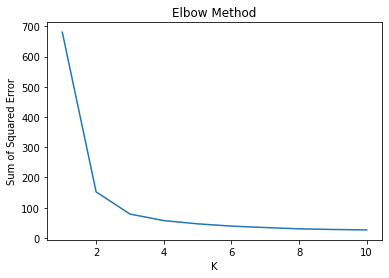

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')
plt.plot(k_rng, sse)

**# Taing 3 as no. of clusters using the Elbow method**

In [22]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**# Adding cluster column to the dataframe**

In [23]:
df['cluster']= y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [24]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
clu_centers=km.cluster_centers_

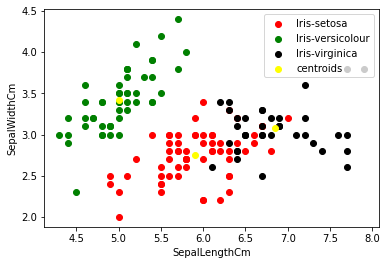

In [25]:
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm, c='red', label = 'Iris-setosa')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm, c='green', label = 'Iris-versicolour')
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm, c='black', label = 'Iris-virginica')
plt.scatter(clu_centers[:,0], clu_centers[:,1], c='yellow', label='centroids')
plt.legend(loc='upper right')